In [2]:
%matplotlib inline
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.interpolate import griddata
import numpy as np
import os
import subprocess
import seaborn as sns    # pip install seaborn
from pylab import rcParams
import matplotlib.patches as mpatch

In [3]:
import pandas as pd
z = pd.read_csv('fes_draft.csv', header=None)
z = z.to_numpy()
z = [i+0 for i in z]
x = pd.read_csv('x_draft.csv', header=None)
x = x.to_numpy()*10

y = pd.read_csv('y_draft.csv', header=None)
y = y.to_numpy()
#sns.set(style="whitegrid", context='paper')
axes_font_size = 18
title_font_size = 20
label_size = 14
#xi, yi = np.mgrid[min(x):max(x):100j, min(y):max(y):100j]
plt.rcParams['xtick.labelsize'] = label_size 
plt.rcParams['ytick.labelsize'] = label_size 
plt.rcParams['axes.labelsize'] = axes_font_size
plt.rcParams['axes.titlesize'] = title_font_size
plt.rcParams['legend.fontsize'] = label_size
plt.rcParams['figure.titlesize'] = title_font_size

data = np.loadtxt("paths_WT.csv", delimiter=",", skiprows=1)
pathx = data[:, 0]*10
pathy = data[:, 1]
f = data[:, 2]

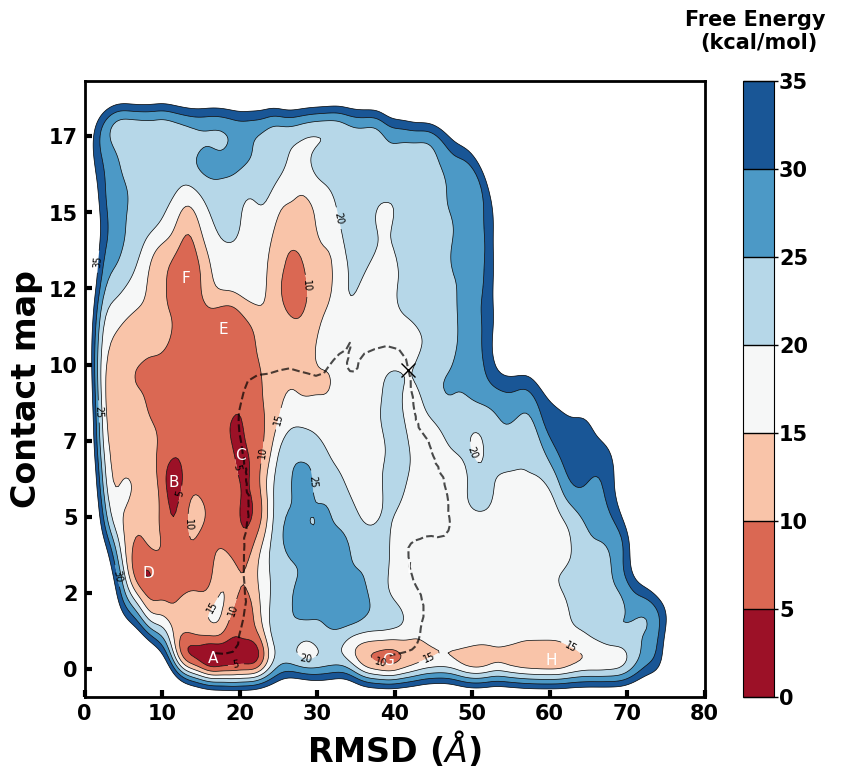

In [29]:
import matplotlib.ticker as ticker
colormap = plt.cm.RdBu
fig, ax = plt.subplots(figsize=(10,8))


cv1 = 'RMSD ($\AA$)'
cv2 = 'Contact map'

#iso = max(z)/18 # increase 15 to increase the number of isosurfaces and therefore the granulatiry of the resulting FES
#iso = np.max(z)/18 # increase 15 to increase the number of isosurfaces and therefore the granulatiry of the resulting FES
levels = np.arange(0.0, 40, 5)


xi, yi = np.mgrid[min(x):max(x):256j, min(y):max(y):256j]
    
# contour the gridded data
#cset = plt.contour(xi,yi,z, levels,colors= 'k', linewidths=0.5, antialiased=True)
cset = plt.contourf(xi,yi,z, levels, cmap=colormap, antialiased=True)
clb = plt.colorbar(format='%.0f',ticks=np.arange(0, 50, 5))
clb.ax.set_title('Free Energy \n(kcal/mol)\n', fontweight='bold', fontsize=15) 
clb.outline.set_edgecolor('black')
clb.ax.yaxis.set_tick_params(which='both', color='black', width=1, length=25, direction='in', left=True, right=False)

ax.autoscale(enable=True, axis='x', tight=True)
ax.grid(False)
ax.set_xlabel('RMSD ($\AA$)', fontweight='bold', fontsize=24)
ax.set_ylabel('cmap', fontweight='bold', fontsize=24)
ax.spines['top'].set_color('black')
ax.spines['top'].set_linewidth(7)
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth(7)
ax.spines['left'].set_color('black')
ax.spines['left'].set_linewidth(7)
ax.spines['right'].set_color('black')
ax.spines['right'].set_linewidth(7)
ax.xaxis.set_tick_params(which='both', color='black', width=3, length=5, direction='in', bottom=True, top=False)
ax.xaxis.get_ticklines()[0].set_linestyle('dashed')
ax.xaxis.get_ticklines()[0].set_dashes([8, 4])
ax.yaxis.set_tick_params(which='both', color='black', width=3, length=5, direction='in', left=True, right=False)
ax.yaxis.get_ticklines()[0].set_linestyle('dashed')

    # Set the tick formatter to format as integers
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
for tick_label in ax.get_xticklabels() + ax.get_yticklabels():
        tick_label.set_fontweight('bold')
        tick_label.set_fontsize(15)  # Set tick label font size

# Adjust tick label padding
ax.tick_params(axis='both', which='both', pad=5)
    
# Make tick labels bold
for tick_label in ax.get_xticklabels() + ax.get_yticklabels():
        tick_label.set_fontweight('bold')
        
for label in clb.ax.yaxis.get_ticklabels():
    label.set_weight("bold")
    label.set_fontsize(15)

#clb.ax.set_ylabel('kcal/mol', rotation=270) 
ax.set_xlim(0, 80) # CV1 walls
ax.set_ylim(np.min(y), np.max(y)) # CV2 walls
ax.set_xlabel(cv1,fontweight='bold')
ax.set_ylabel(cv2,fontweight='bold') 

ax.spines['top'].set_linewidth(2)
ax.spines['top'].set_color('black')
ax.spines['right'].set_linewidth(2)
ax.spines['right'].set_color('black')
ax.spines['bottom'].set_linewidth(2)
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linewidth(2)
ax.spines['left'].set_color('black')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
#ax.grid(linestyle='dashed')
plt.plot(pathx, pathy, 'black', alpha=0.7, linestyle='dashed')
a = {'family': 'calibri','verticalalignment': 'center', 'horizontalalignment': 'center'}
ax.text(16.6, 0.36, 'A', fontsize=11, color='white',fontdict=a)
ax.text(11.47, 6.15, 'B', fontsize=11, color='white',fontdict=a)
ax.text(20.18, 7.03, 'C', fontsize=11, color='white',fontdict=a)
ax.text(8.2, 3.14, 'D', fontsize=11, color='white',fontdict=a)
ax.text(17.92, 11.15, 'E', fontsize=11, color='white',fontdict=a)
ax.text(13.08, 12.82, 'F', fontsize=11, color='white',fontdict=a)
ax.text(39.22, 0.28, 'G', fontsize=11, color='white',fontdict=a)
ax.text(60.2, 0.28, 'H', fontsize=11, color='white',fontdict=a)
ax.text(41.81, 3.3, 'I', fontsize=11, color='white',fontdict=a)
plt.plot(41.79,9.82,'x',c='black',markersize=10,)
ax.grid(visible=True)
ax.grid(visible=False)
# plot the isolevels
cset2 = plt.contour(xi, yi, z, levels, colors='black', linewidths=0.5, alpha=1, antialiased=True)

plt.clabel(cset2, inline=True, fontsize=7, fmt='%1.0f')

plt.savefig('fes_WT_new_minima_paths_format.png', dpi=300, transparent=False)